In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "../")
import scipy
from scipy.interpolate import interp1d
import fdasrsf as fs

In [2]:
signal = np.sin(2*np.pi*np.linspace(0,1,200))

Initializing...
Compute Karcher Mean of 100 function in SRSF space with lam=0.000000
updating step: r=1
updating step: r=2
updating step: r=3
Initializing...
Compute Karcher Mean of 100 function in SRSF space with lam=0.000000
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached
Initializing...
Compute Karcher Mean of 100 function in SRSF space with lam=0.000000
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updati

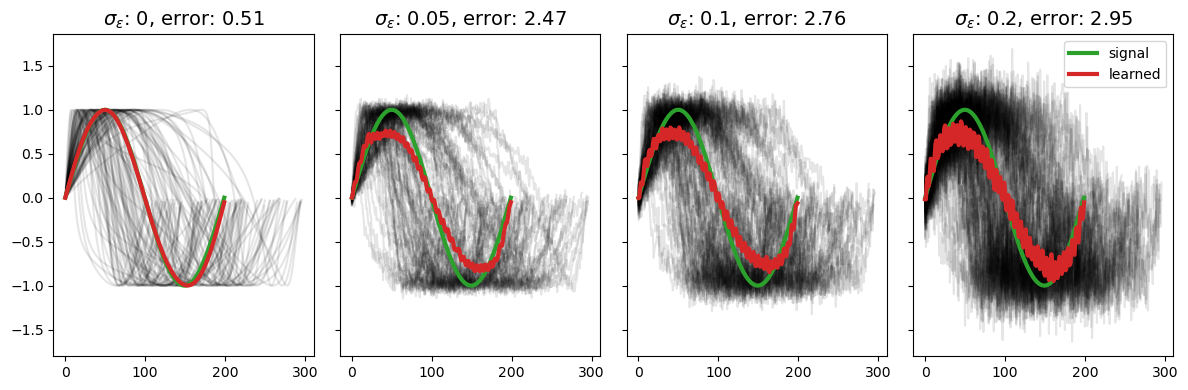

In [23]:
noise_ratio = [0,0.05,0.1,0.2]

fig,axs = plt.subplots(1,4,figsize=(12,4),sharey=True)
for i,r in enumerate(noise_ratio):

    X_mask = np.load("dataset/Xmask.npy").squeeze()
    X = np.load(f"dataset/X_{int(r*100)}.npy").squeeze()
    X = [x[xm] for x,xm in zip(X,X_mask)]
    Xf = [x[:,1] for x in X]
    lengths = [x.shape[0] for x in X]
    medl = 200 
    time = np.linspace(0,1,medl)

    lst = []
    for x in X:
        f = interp1d(*x.T)
        lst.append(f(np.linspace(x[0,0],x[-1,0],medl)))
    arr = np.array(lst)

    obj = fs.fdawarp(arr.T,time)
    obj.srsf_align(parallel=True,cores=20,MaxItr=20)

    fbar = np.mean(obj.fn,axis=1)
    for x in X: 
        axs[i].plot(x[:,1],color="black",alpha=0.1)
    axs[i].plot(signal,color="tab:green",label="signal",linewidth=3)
    axs[i].plot(fbar,color="tab:red",label = "learned",linewidth=3)
    
    axs[i].set_title(r"$\sigma_{\epsilon}$"+f": {np.around(r,2)}" + f", error: {np.around(np.linalg.norm(signal-fbar),2)}" ,fontsize=14)

    if i == len(noise_ratio)-1: 
        axs[i].legend()

fig.tight_layout()
    

In [25]:
fig.savefig("results/fpca_barycenter.svg")